### Building the lipid

In [ ]:
from openff.interchange import Interchange
from openff.toolkit import Molecule, ForceField, Topology
import numpy as np

Warning (not error because allow_undefined_stereo=True): RDMol has unspecified stereochemistry. Undefined chiral centers are:
 - Atom P (index 3)



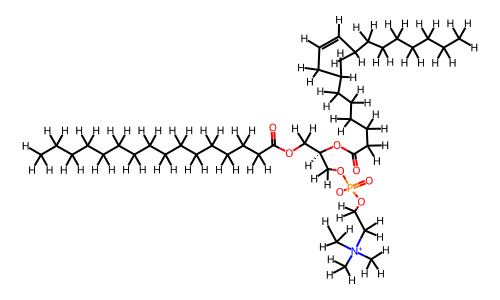

In [3]:
# Create a molecule from a SMILES string
# If missing stereochemistry, "allow_undefined_stereo=True"
lipid = Molecule.from_smiles("[C@](COP(=O)([O-])OCC[N+](C)(C)C)([H])(OC(CCCCCCC/C=C\CCCCCCCC)=O)COC(CCCCCCCCCCCCCCC)=O", allow_undefined_stereo=True)
lipid.visualize()

In [ ]:
# Define ff version | refer to this repo for updates and alternatives for water versions: https://github.com/openforcefield/openff-forcefields
forcefield = ForceField("openff-2.1.0.offxml")

# Lipid abbreviation used for 
lipid.name = "POPC"

# Replace resname and generate unique atom names by element frequency (C1, C2, C3...)
for i, atom in enumerate(lipid.atoms, 3):
    atom.metadata["residue_name"] = "POPC"
lipid.generate_unique_atom_names()
lipid.generate_conformers()

# Create Interchange topology
interchange = forcefield.create_interchange(lipid.to_topology())

# GROMACS output structure for Packmol
interchange.to_top("Inter_POPC.top")
interchange.to_gro("Inter_POPC.gro")

### Building the water

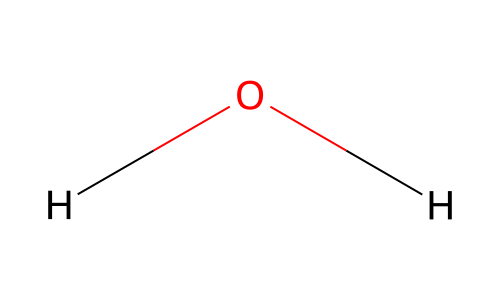

In [6]:
water = Molecule.from_smiles("O")
water.visualize()

In [ ]:
# Define ff version
forcefield = ForceField("tip3p.offxml")

water.name = "TIP3P"

for i, atom in enumerate(water.atoms, 3):
    atom.metadata["residue_name"] = "TIP3P"
water.generate_unique_atom_names()
water.generate_conformers()

interchange = forcefield.create_interchange(water.to_topology())

# PDB structure for Packmol
interchange.to_pdb("water.pdb")
interchange.to_top("water.top")

### Parametrize the system after Packmol

In [6]:

# Define ff versions
forcefield = ForceField("openff-2.1.0.offxml", "tip3p.offxml")

system = Topology.from_pdb("bilayer.pdb")

water.name = "TIP3P"
lipid.name = "POPC"

for i, atom in enumerate(water.atoms, 3):
    atom.metadata["residue_name"] = "TIP3P"
water.generate_unique_atom_names()
water.generate_conformers()
for i, atom in enumerate(lipid.atoms, 3):
    atom.metadata["residue_name"] = "POPC"
lipid.generate_unique_atom_names()
lipid.generate_conformers()

interchange = forcefield.create_interchange(system.to_topology())

interchange.to_top("topol.top")
interchange.to_gro("bilayer.gro")

OSError: Source 'openff-2.1.0.offxml, tip3p.offxml' could not be read. If this is a file, ensure that the path is correct.
Looked in the following paths and found no files named 'openff-2.1.0.offxml, tip3p.offxml':
    /Users/patrickfrankel/Desktop/SMILES_POPC
    /Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/smirnoff99frosst/offxml
    /Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/openforcefields/offxml
    /Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/openff/amber_ff_ports/offxml
If 'openff-2.1.0.offxml, tip3p.offxml' is present as a file, ensure it is in a known SMIRNOFF encoding.
Valid formats are: ['XML']
Parsing failed while trying to parse source as a file with the following exception and message:
<class 'openff.toolkit.utils.exceptions.SMIRNOFFParseError'>
syntax error: line 1, column 0
